介绍一些tensor的基础操作

In [1]:
import torch
import numpy as np
a=torch.tensor([[1,2],[3,4],[5,6]],dtype=torch.float64, device="cuda:0")
a

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]], device='cuda:0', dtype=torch.float64)

In [2]:
print(a.size())
print(a.shape)


torch.Size([3, 2])
torch.Size([3, 2])


In [3]:
a.numel()#元素总数

6

In [4]:
a.reshape(-1,3)

tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0', dtype=torch.float64)

In [5]:
zeros=torch.zeros((3,2))
zeros

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

torch.randn((a,b))：生成服从标准正态分布（均值为0，标准差为1）且形状为(a,b)的随机张量   
torch.rand(a, b)：生成服从均匀分布（范围在[0, 1)）且形状为(a,b)的随机数,等价于torch.rand((a, b))

In [6]:
rdm=torch.randn((3,2))
rdu=torch.rand(3,2)
rdm,rdu

(tensor([[-1.3449, -0.9841],
         [ 1.5569,  1.0943],
         [-1.7823, -0.9264]]),
 tensor([[0.4925, 0.7388],
         [0.1090, 0.4072],
         [0.5261, 0.3473]]))

In [7]:
rdm[0,1]

tensor(-0.9841)

In [8]:
rdm[0,1]=888
rdm

tensor([[ -1.3449, 888.0000],
        [  1.5569,   1.0943],
        [ -1.7823,  -0.9264]])

使用赋值符号相当于C++里面的引用，共用同一份数据，使用clone创建副本

In [9]:
ref=rdm[:1,:]
copy=rdm[:1,:].clone()
print(ref)
print(copy)
ref[0,1]=666
copy[0,1]=55

tensor([[ -1.3449, 888.0000]])
tensor([[ -1.3449, 888.0000]])


In [10]:
rdm

tensor([[ -1.3449, 666.0000],
        [  1.5569,   1.0943],
        [ -1.7823,  -0.9264]])

切片，可以用[-1]选择最后一个元素  
为多个元素赋值相同的值，我们只需要索引所有元素，然后为它们赋值

In [11]:
print(rdm[-1])
rdm[0,:]=10
rdm

tensor([-1.7823, -0.9264])


tensor([[10.0000, 10.0000],
        [ 1.5569,  1.0943],
        [-1.7823, -0.9264]])

Tensor可以和numpy的ndarray互转

In [12]:
np_rdm=rdm.numpy()
np_rdm

array([[10.       , 10.       ],
       [ 1.5568967,  1.0942963],
       [-1.7823232, -0.9264372]], dtype=float32)

In [13]:
np_a=np.arange(12).reshape((3,4))
np_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

共享内存的互转

In [14]:
ts_a=torch.from_numpy(np_a)#Tensor 与 NumPy 数组共享内存（修改一方会影响另一方）
ts_a

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [15]:
np_ref=rdm.numpy()
ts_ref=torch.as_tensor(np_ref)#接受更多输入类型（如列表、其他 Tensor）
ts_copy=torch.tensor(np_ref)# 复制数据，生成独立 Tensor,不共享内存‌
type(np_ref),type(ts_copy),type(ts_ref)

(numpy.ndarray, torch.Tensor, torch.Tensor)

In [16]:
print(rdm)
rdm[:,1]=5
print(np_ref)
print(ts_ref)
print(ts_copy)

tensor([[10.0000, 10.0000],
        [ 1.5569,  1.0943],
        [-1.7823, -0.9264]])
[[10.         5.       ]
 [ 1.5568967  5.       ]
 [-1.7823232  5.       ]]
tensor([[10.0000,  5.0000],
        [ 1.5569,  5.0000],
        [-1.7823,  5.0000]])
tensor([[10.0000, 10.0000],
        [ 1.5569,  1.0943],
        [-1.7823, -0.9264]])


使用 torchvision.transforms  
将 NumPy 格式的图片（HWC 格式，值域 [0, 255]）转换为 Tensor（CHW 格式，值域 [0.0, 1.0]

In [17]:
from PIL import Image
from torchvision import transforms
 
img = Image.open("image.jpg")  # PIL.Image 对象 （H,W,C）
tensor_trans = transforms.ToTensor()
tensor_img = tensor_trans(img)  # 转为 Tensor (C, H, W)
tensor_img.shape

torch.Size([4, 275, 976])

tensor计算
张量加法有两种形式，一种是直接使用加号，另一种使用torch.add方法

In [18]:
ts_b=torch.randn((3,4))
ts_b

tensor([[ 0.8837,  0.2419, -2.1839, -0.2957],
        [ 1.5030, -0.8584,  0.8594,  2.6033],
        [-1.9133,  0.7491, -0.1736, -1.1422]])

In [19]:
ts_a+ts_b

tensor([[ 0.8837,  1.2419, -0.1839,  2.7043],
        [ 5.5030,  4.1416,  6.8594,  9.6033],
        [ 6.0867,  9.7491,  9.8264,  9.8578]])

In [20]:
torch.add(ts_a,ts_b)

tensor([[ 0.8837,  1.2419, -0.1839,  2.7043],
        [ 5.5030,  4.1416,  6.8594,  9.6033],
        [ 6.0867,  9.7491,  9.8264,  9.8578]])

广播broadcast,标量与tensor加减法，会把标量扩张为tensor的维度，然后再逐个元素加减

In [21]:
ts_a+5

tensor([[ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16]])

In [22]:
ts_row=torch.from_numpy(np.arange(2,6).reshape(1,4))
ts_row

tensor([[2, 3, 4, 5]])

矩阵运算，矩阵乘行向量，运算不同于线性代数，这里的计算是针对元素的，要求列数相同，左乘右乘完全相同  
相当于把向量作了广播变成两个形状相同的tensor，再进行计算  
广播机制要求维度相同，标量除外 

In [23]:
print(ts_a.shape)
print(ts_a)
print(ts_row.shape)
print(ts_row)

torch.Size([3, 4])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
torch.Size([1, 4])
tensor([[2, 3, 4, 5]])


In [24]:
ts_a*ts_row

tensor([[ 0,  3,  8, 15],
        [ 8, 15, 24, 35],
        [16, 27, 40, 55]])

In [25]:
ts_row*ts_a

tensor([[ 0,  3,  8, 15],
        [ 8, 15, 24, 35],
        [16, 27, 40, 55]])

矩阵与列向量，要求行数相同，左乘右乘完全相同  
相当于把向量作了广播变成两个形状相同的tensor，再进行计算

In [26]:
ts_vec=torch.arange(3).reshape(3,1)
ts_vec

tensor([[0],
        [1],
        [2]])

In [27]:
print(ts_a.shape)
print(ts_a)
print(ts_vec.shape)
print(ts_vec)

torch.Size([3, 4])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
torch.Size([3, 1])
tensor([[0],
        [1],
        [2]])


In [28]:
ts_a*ts_vec

tensor([[ 0,  0,  0,  0],
        [ 4,  5,  6,  7],
        [16, 18, 20, 22]])

In [29]:
ts_vec*ts_a

tensor([[ 0,  0,  0,  0],
        [ 4,  5,  6,  7],
        [16, 18, 20, 22]])

更一般化的广播机制,把两个不同的行列向量分别在长度为1的轴上进行扩展，最终得到两个形状相同的张量，再进行计算

In [30]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b,a + b


(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]),
 tensor([[0, 1],
         [1, 2],
         [2, 3]]))

矩阵相乘，要求形状相同，左乘右乘完全相同

In [31]:
ts_matrix=torch.from_numpy(np.arange(2,14).reshape(3,4))
ts_matrix

tensor([[ 2,  3,  4,  5],
        [ 6,  7,  8,  9],
        [10, 11, 12, 13]])

In [32]:
print(ts_a.shape)
print(ts_a)
print(ts_matrix.shape)
print(ts_matrix)


torch.Size([3, 4])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
torch.Size([3, 4])
tensor([[ 2,  3,  4,  5],
        [ 6,  7,  8,  9],
        [10, 11, 12, 13]])


In [33]:
ts_a*ts_matrix

tensor([[  0,   3,   8,  15],
        [ 24,  35,  48,  63],
        [ 80,  99, 120, 143]])

In [34]:
ts_matrix*ts_a

tensor([[  0,   3,   8,  15],
        [ 24,  35,  48,  63],
        [ 80,  99, 120, 143]])

In [35]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y  # **运算符是求幂运算

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

reshape方法，还有一个view方法有一样的效果  
连续张量指的是张量的数据在内存中是连续存储的，没有间隔。也就是说，从第一个元素到最后一个元素，内存地址是连续的，没有跳跃。  
例如，经过转置（transpose(0,1)）的二维张量，其逻辑形状是 [M, N]，但物理存储仍按原始顺序 [N, M] 排列，导致访问时需要跳过其他行的数据，无法直接连续读取  
view()：严格要求输入张量是连续的。若张量非连续（如通过transpose()、permute()等操作后），调用view()会抛出RuntimeError  
reshape()：自动处理非连续张量。若输入非连续，reshape()会隐式复制数据，生成一个新的连续张量，再调整形状，连续输入 → 返回视图（无数据复制）。 

In [36]:
x = torch.randn(6, 8)
y=x.view(-1,12)#负1表示这一个维度通过推断得到。
y

tensor([[ 1.3755e+00,  4.5705e-01, -1.0190e+00,  1.6375e+00, -1.3994e-01,
          1.9693e+00,  1.2808e+00,  1.5068e+00,  7.6435e-01, -1.9178e-03,
         -1.1962e+00,  3.2446e-01],
        [-7.9649e-01,  5.4626e-01, -9.7257e-01,  1.8965e+00, -1.8460e+00,
         -4.0690e-01,  4.7872e-01, -1.5067e+00,  4.2544e-01, -4.7201e-01,
          8.2873e-01,  1.6074e-01],
        [ 1.7434e-01, -5.4094e-01,  5.9473e-01,  1.0494e+00,  1.1639e+00,
          5.9570e-01,  1.1696e-02,  5.3159e-01, -4.8088e-01,  8.6180e-01,
          1.2247e+00,  5.7862e-01],
        [ 3.6085e-02,  1.7781e+00, -9.4420e-01,  4.7750e-01, -1.6821e+00,
          1.4227e-02,  1.2542e-01, -3.7391e-01, -3.1639e-02, -1.4921e+00,
         -6.8559e-01, -7.3700e-01]])

In [37]:
z=y.view(48)
z

tensor([ 1.3755e+00,  4.5705e-01, -1.0190e+00,  1.6375e+00, -1.3994e-01,
         1.9693e+00,  1.2808e+00,  1.5068e+00,  7.6435e-01, -1.9178e-03,
        -1.1962e+00,  3.2446e-01, -7.9649e-01,  5.4626e-01, -9.7257e-01,
         1.8965e+00, -1.8460e+00, -4.0690e-01,  4.7872e-01, -1.5067e+00,
         4.2544e-01, -4.7201e-01,  8.2873e-01,  1.6074e-01,  1.7434e-01,
        -5.4094e-01,  5.9473e-01,  1.0494e+00,  1.1639e+00,  5.9570e-01,
         1.1696e-02,  5.3159e-01, -4.8088e-01,  8.6180e-01,  1.2247e+00,
         5.7862e-01,  3.6085e-02,  1.7781e+00, -9.4420e-01,  4.7750e-01,
        -1.6821e+00,  1.4227e-02,  1.2542e-01, -3.7391e-01, -3.1639e-02,
        -1.4921e+00, -6.8559e-01, -7.3700e-01])

In [38]:
y=x.reshape(-1,12)
y

tensor([[ 1.3755e+00,  4.5705e-01, -1.0190e+00,  1.6375e+00, -1.3994e-01,
          1.9693e+00,  1.2808e+00,  1.5068e+00,  7.6435e-01, -1.9178e-03,
         -1.1962e+00,  3.2446e-01],
        [-7.9649e-01,  5.4626e-01, -9.7257e-01,  1.8965e+00, -1.8460e+00,
         -4.0690e-01,  4.7872e-01, -1.5067e+00,  4.2544e-01, -4.7201e-01,
          8.2873e-01,  1.6074e-01],
        [ 1.7434e-01, -5.4094e-01,  5.9473e-01,  1.0494e+00,  1.1639e+00,
          5.9570e-01,  1.1696e-02,  5.3159e-01, -4.8088e-01,  8.6180e-01,
          1.2247e+00,  5.7862e-01],
        [ 3.6085e-02,  1.7781e+00, -9.4420e-01,  4.7750e-01, -1.6821e+00,
          1.4227e-02,  1.2542e-01, -3.7391e-01, -3.1639e-02, -1.4921e+00,
         -6.8559e-01, -7.3700e-01]])

In [39]:
z=y.reshape(48)
z

tensor([ 1.3755e+00,  4.5705e-01, -1.0190e+00,  1.6375e+00, -1.3994e-01,
         1.9693e+00,  1.2808e+00,  1.5068e+00,  7.6435e-01, -1.9178e-03,
        -1.1962e+00,  3.2446e-01, -7.9649e-01,  5.4626e-01, -9.7257e-01,
         1.8965e+00, -1.8460e+00, -4.0690e-01,  4.7872e-01, -1.5067e+00,
         4.2544e-01, -4.7201e-01,  8.2873e-01,  1.6074e-01,  1.7434e-01,
        -5.4094e-01,  5.9473e-01,  1.0494e+00,  1.1639e+00,  5.9570e-01,
         1.1696e-02,  5.3159e-01, -4.8088e-01,  8.6180e-01,  1.2247e+00,
         5.7862e-01,  3.6085e-02,  1.7781e+00, -9.4420e-01,  4.7750e-01,
        -1.6821e+00,  1.4227e-02,  1.2542e-01, -3.7391e-01, -3.1639e-02,
        -1.4921e+00, -6.8559e-01, -7.3700e-01])

torch.clamp(data,min,max)  
将data里面的所有数值限定到[min,max]之间，超过边界的等于边界

In [40]:
torch.clamp(z,-0.5,1)

tensor([ 1.0000,  0.4571, -0.5000,  1.0000, -0.1399,  1.0000,  1.0000,  1.0000,
         0.7643, -0.0019, -0.5000,  0.3245, -0.5000,  0.5463, -0.5000,  1.0000,
        -0.5000, -0.4069,  0.4787, -0.5000,  0.4254, -0.4720,  0.8287,  0.1607,
         0.1743, -0.5000,  0.5947,  1.0000,  1.0000,  0.5957,  0.0117,  0.5316,
        -0.4809,  0.8618,  1.0000,  0.5786,  0.0361,  1.0000, -0.5000,  0.4775,
        -0.5000,  0.0142,  0.1254, -0.3739, -0.0316, -0.5000, -0.5000, -0.5000])

堆叠cat  
torch.cat(tensors, dim=0, *, out=None):沿指定维度拼接张量序列，不增加新维度，输出张量维度与输入一致  
torch.stack(tensors, dim=0, *, out=None):沿新维度dim堆叠张量序列，输出张量维度+1  
tensors.squeeze():去除冗余维度  
reshape方法返回一个新的张量，但并不会改变原始张量A和B的值，除非赋值给A和B  

以下三种，要求除连接轴外的其他轴形状相同,维度必须相同，不会增加维度  
torch.vstack()：垂直拼接（沿维度0），等价于 torch.cat(..., dim=0)  
torch.hstack():水平拼接（沿维度1），等价于 torch.cat(..., dim=1)  
torch.dstack()：深度堆叠（沿维度2），适用于三维数据（如图像通道叠加）  


In [41]:
A = torch.arange(12).reshape((3, 1,4))
B = torch.arange(8).reshape((2, 1,4))
out=torch.vstack((A,B))
out,out.shape

(tensor([[[ 0,  1,  2,  3]],
 
         [[ 4,  5,  6,  7]],
 
         [[ 8,  9, 10, 11]],
 
         [[ 0,  1,  2,  3]],
 
         [[ 4,  5,  6,  7]]]),
 torch.Size([5, 1, 4]))

In [42]:
out=torch.cat((A,B),0)
out,out.shape

(tensor([[[ 0,  1,  2,  3]],
 
         [[ 4,  5,  6,  7]],
 
         [[ 8,  9, 10, 11]],
 
         [[ 0,  1,  2,  3]],
 
         [[ 4,  5,  6,  7]]]),
 torch.Size([5, 1, 4]))

In [43]:
A=A.reshape(1,3,4)
B=B.reshape(1,2,4)
out=torch.hstack((A,B))
out,out.shape

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11],
          [ 0,  1,  2,  3],
          [ 4,  5,  6,  7]]]),
 torch.Size([1, 5, 4]))

In [44]:
out=torch.cat((A,B),1)
out,out.shape

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11],
          [ 0,  1,  2,  3],
          [ 4,  5,  6,  7]]]),
 torch.Size([1, 5, 4]))

In [45]:
A=A.reshape(1,4,3)
B=B.reshape(1,4,2)
out=torch.dstack((A,B))
out,out.shape

(tensor([[[ 0,  1,  2,  0,  1],
          [ 3,  4,  5,  2,  3],
          [ 6,  7,  8,  4,  5],
          [ 9, 10, 11,  6,  7]]]),
 torch.Size([1, 4, 5]))

In [46]:
out=torch.cat((A,B),2)
out,out.shape

(tensor([[[ 0,  1,  2,  0,  1],
          [ 3,  4,  5,  2,  3],
          [ 6,  7,  8,  4,  5],
          [ 9, 10, 11,  6,  7]]]),
 torch.Size([1, 4, 5]))

In [47]:
A = torch.arange(0,12,1).reshape((3, 1,4))
B = torch.arange(5,17,1).reshape((3, 1,4))
A=A.squeeze()
B=B.squeeze()
out=torch.stack((A,B),dim=0)
A.shape,B.shape,out.shape

(torch.Size([3, 4]), torch.Size([3, 4]), torch.Size([2, 3, 4]))

torch.unsqueeze() 在指定维度添加一个长度为1的维度

In [48]:
A=A.unsqueeze(0)
B=torch.unsqueeze(B,dim=0)
A.shape,B.shape

(torch.Size([1, 3, 4]), torch.Size([1, 3, 4]))

torch.linspace用于在一个区间上生成指定长度的等距序列，返回一维tensor  
torch.linspace(start, end, steps, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor  
start   float	序列的起始值（包含）  
end     float	序列的结束值（包含）  
steps   int	    生成的样本总数  

In [49]:
X=torch.linspace(-1.0, 1.0, 101)
Y=torch.linspace(-1.0, 1.0, 101)
X[:10],Y[:10]

(tensor([-1.0000, -0.9800, -0.9600, -0.9400, -0.9200, -0.9000, -0.8800, -0.8600,
         -0.8400, -0.8200]),
 tensor([-1.0000, -0.9800, -0.9600, -0.9400, -0.9200, -0.9000, -0.8800, -0.8600,
         -0.8400, -0.8200]))

torch.meshgrid 从多个一维坐标数组中创建网格坐标矩阵，返回的是坐标矩阵而不是数据网格，用于从坐标向量创建坐标矩阵，常用于生成网格点的坐标。  
torch.meshgrid(*tensors, indexing='ij')-->tuple(输入数量个tensors)  
    *tensors：一个或多个一维张量，表示不同维度的坐标值  
    indexing：索引模式，可选 'ij'（矩阵索引）或 'xy'（笛卡尔索引）  



In [50]:
Z=torch.meshgrid(X,Y)
ZX=Z[0]
ZY=Z[1]
Z[0].shape,(Z[0][1][1],Z[1][1][1])

/home/zhangjinrui/AppDisk/anaconda3/envs/pytorch/lib/python3.10/site-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4322.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


(torch.Size([101, 101]), (tensor(-0.9800), tensor(-0.9800)))

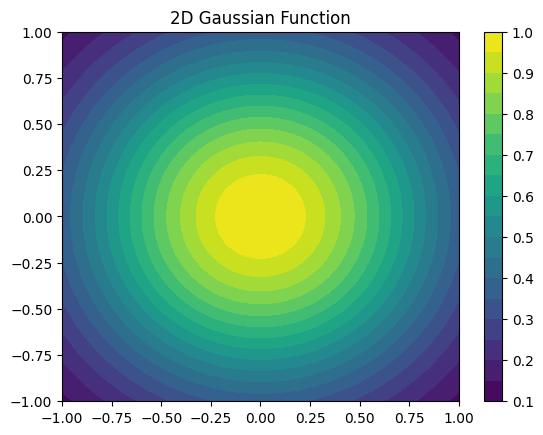

In [51]:
import matplotlib.pyplot as plt
Z = torch.exp(-(ZX**2 + ZY**2))
plt.contourf(ZX.numpy(), ZY.numpy(), Z.numpy(), levels=20)
plt.colorbar()
plt.title("2D Gaussian Function")
plt.show()

<pre>gather  
根据指定的索引（index），沿着指定的维度（dim），从源张量（input）中收集对应的值  
torch.gather(input, dim, index, *, sparse_grad=False, out=None) → Tensor

最常用的三个参数是  

input(Tensor)：源张量，也就是我们要从中取数据的“仓库”。  
dim(int)：指定的维度，决定了我们在哪个维度上进行收集操作。dim的值必须小于 input的维度（input.dim()）
index(LongTensor)：索引张量，包含了在 dim维度上要收集的元素的索引位置。它必须是与 input同维度的长整型张量

一个关键规则是：输出张量（out）的形状与 index张量的形状完全相同。你可以理解为，index不仅指定了取哪些数，也定义了最终结果的“容器”形状。

In [52]:
import torch

# 源张量 input
input_tensor = torch.tensor([[1, 2, 3],
                             [4, 5, 6],
                             [7, 8, 9]])
# 索引张量 index
index = torch.tensor([[0, 1, 0],
                      [2, 0, 1]])

print("Input tensor:\n", input_tensor,input_tensor.shape)
print("Index tensor:\n", index,index.shape)

Input tensor:
 tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]) torch.Size([3, 3])
Index tensor:
 tensor([[0, 1, 0],
        [2, 0, 1]]) torch.Size([2, 3])


对于二维张量（矩阵）：

当 dim=0时：out[i][j] = input[index[i][j]][j]。这意味着沿着第0维（行）进行索引，index[i][j]指定了行号，j指定了列号

当 dim=1时：out[i][j] = input[i][index[i][j]]。这意味着沿着第1维（列）进行索引，i指定了行号，index[i][j]指定了列号

In [53]:
""" 
in[0][0] in[1][1] in[0][2]
in[2][0] in[0][1] in[1][2]
 """
result_dim0 = torch.gather(input_tensor, dim=0, index=index)
print("Result when dim=1:\n", result_dim0)

Result when dim=1:
 tensor([[1, 5, 3],
        [7, 2, 6]])


In [54]:
""" 
in[0][0] in[0][1] in[0][0]
in[1][2] in[1][0] in[1][1]
 """
result_dim1 = torch.gather(input_tensor, dim=1, index=index)
print("Result when dim=1:\n", result_dim1)

Result when dim=1:
 tensor([[1, 2, 1],
        [6, 4, 5]])


<pre>对于三维张量：

当 dim=0时：out[i][j][k] = input[ index[i][j][k] ] [j][k]

当 dim=1时：out[i][j][k] = input[i] [ index[i][j][k] ] [k]

当 dim=2时：out[i][j][k] = input[i][j] [ index[i][j][k] ]

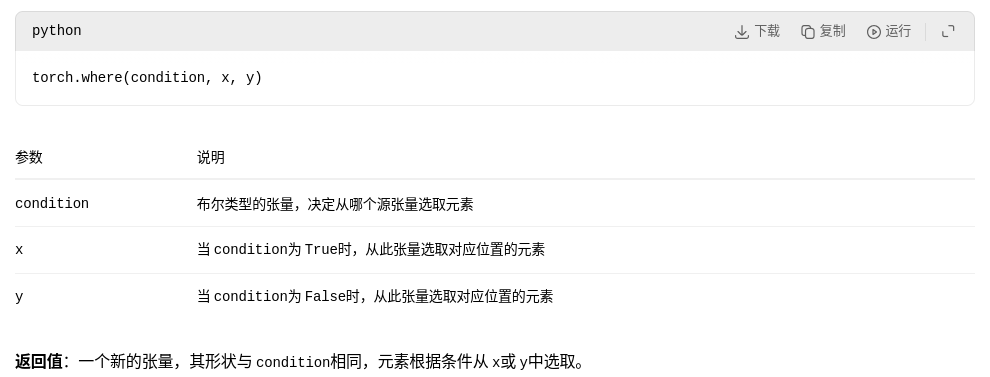

In [55]:
a = torch.tensor([1, 2, 3, 4, 5])
b = torch.tensor([10, 20, 30, 40, 50])
condition = torch.tensor([True, False, True, False, True])

result = torch.where(condition, a, b)
print(result)  # 输出: tensor([ 1, 20,  3, 40,  5])

tensor([ 1, 20,  3, 40,  5])
